<div style="margin:0;">
<header><h1 style="text-align: center; padding: 30px; font-size: 3em">Projeto I - Avaliação da Disciplina Estatística Computacional</h1></header>
    <div style="background-color: lightgray; border: 1px solid Black;  width: 85%; padding: 30px; margin:auto; text-align: center; border-radius: 10px 0; font-weight: bold;">
        Análise Exploratória dos Acidentes de Trânsito em Rodovias Federais
    </div>
</div>

<h2>1. Problema:</h2>
<p>O proposito desse projeto, é verificar se a pandemia da COVID-19 gerou efeitos na redução do número de acidentes nas rodovias federais brasileiras. Além de possibilitar o aprendizado no manuseio e análise dos dados de acidentes, especificamente dos anos de 2018, 2019, 2020 e 2021.</p>

<p><strong>Descrição dos dados:</strong></p>
<ul>
  <li><em>id</em> - Variável com valores numéricos, representando o identificador do acidente.
  <li><em>data_inversa</em> - Data da ocorrência no formato americano.            
  <li><em>uf</em> - Unidade da Federação.                      
  <li><em>br</em> - Variável com valores numericos, representando o identificador da BR do acidente.                      
  <li><em>municipio</em> - Nome do município de ocorrência do acidente.              
  <li><em>causa_acidente</em> - Identificação da causa principal do acidente. <br>Nesse conjunto de dados são excluídos os acidentes com a variável causa principal igual a "Não".           
  <li><em>tipo_acidente</em> - Identificação do tipo de acidente.           
  <li><em>classificacao_acidente</em> - Classifica quanto à gravidade do acidente.  
  <li><em>condicao_metereologica</em> - Condição meteorológica no momento do acidente. 
  <li><em>pessoas</em> - Total de pessoas envolvidas na ocorrência.                 
  <li><em>mortos</em> - Total de pessoas mortas envolvidas na ocorrência.                  
  <li><em>feridos_leves</em> - Total de pessoas com ferimentos leves envolvidas na ocorrência.           
  <li><em>feridos_graves</em> - Total de pessoas com ferimentos graves envolvidas na ocorrência.
  <li><em>ilesos</em> - Total de pessoas ilesas envolvidas na ocorrência.                  
  <li><em>ignorados</em> - Total de pessoas envolvidas na ocorrência e que não se soube o estado físico.           
  <li><em>feridos</em> - Total de pessoas feridas envolvidas na ocorrência (é a soma dos feridos leves com os graves).             
  <li><em>veiculos</em> - Total de veículos envolvidos na ocorrência.
</ul>   

<h2>2. Pacotes e bibliotecas</h2>

In [1]:
#Primeiro ponto, importando as bibliotecas utilizadas nesse projeto:
import pandas as pd
import numpy as np


<h2>3. Extração</h2>

In [2]:
#URL dos dados:
url_2018 = "https://arquivos.prf.gov.br/arquivos/index.php/s/MaC6cieXSFACNWT/download"
url_2019 = "https://arquivos.prf.gov.br/arquivos/index.php/s/kRBUylqz6DyQznN/download"
url_2020 = "https://drive.google.com/u/0/uc?id=1esu6IiH5TVTxFoedv6DBGDd01Gvi8785&export=download"
url_2021 = "http://arquivos.prf.gov.br/arquivos/index.php/s/n1T3lymvIdDOzzb/download"

#Conjunto de dados:
df_PRF_18 = pd.read_csv(filepath_or_buffer=url_2018, sep=';', decimal = '.', compression='zip', encoding='latin-1')
df_PRF_19 = pd.read_csv(filepath_or_buffer=url_2019, sep=';', decimal = '.', compression='zip', encoding='latin-1')
df_PRF_20 = pd.read_csv(filepath_or_buffer=url_2020, sep=';', decimal = '.', compression='zip', encoding='latin-1')
df_PRF_21 = pd.read_csv(filepath_or_buffer=url_2021, sep=';', decimal = '.', compression='zip', encoding='latin-1')

In [3]:
# Juntando os DataFrame em uma única base:
df_PRF = pd.concat(objs=[df_PRF_18, df_PRF_19, df_PRF_20, df_PRF_21], axis=0, join='outer')
#consultar o nome das variáveis do DataFrame:
cont_variaveis_original = df_PRF.columns



<h3>3.1 Segmentação dos Dados - Criação de um DataFrame para calendário:</h3>
<p>Essa é uma ótima prática para separar elementos do mesmo tipo do DataFrame central, e deixar ele mais clean.<p>

In [4]:
#Separando as informações desnecessárias do DataFrame central:
#OBS: Caso seja preciso, ainda posso ter acesso aos dados do dia da semana e horário.
df_calendar = df_PRF[['id','data_inversa', 'dia_semana', 'horario', 'fase_dia']]
df_calendar.head(3)

,id,data_inversa,dia_semana,horario,fase_dia
0,100027.0,2018-01-01,segunda-feira,06:00:00,Pleno dia
1,100044.0,2018-01-01,segunda-feira,08:30:00,Pleno dia
2,100046.0,2018-01-01,segunda-feira,08:50:00,Pleno dia


<h3>3.2 Limpando o DataFrame Central</h3>

In [5]:
#limpando o DataFrame das informações desnecessárias por meio da função .drop():
df_PRF.drop(['dia_semana', 'horario', 'km','fase_dia', 'sentido_via', 'tipo_pista', 'tracado_via', 'uso_solo', 'latitude', 'longitude','regional','delegacia', 'uop'], axis=1, inplace=True)


In [6]:
#Consultado o Dtype de cada variável com a função .info():
df_PRF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265003 entries, 0 to 64538
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      265003 non-null  float64
 1   data_inversa            265003 non-null  object 
 2   uf                      265003 non-null  object 
 3   br                      264464 non-null  float64
 4   municipio               265003 non-null  object 
 5   causa_acidente          265003 non-null  object 
 6   tipo_acidente           264963 non-null  object 
 7   classificacao_acidente  265003 non-null  object 
 8   condicao_metereologica  265003 non-null  object 
 9   pessoas                 265003 non-null  int64  
 10  mortos                  265003 non-null  int64  
 11  feridos_leves           265003 non-null  int64  
 12  feridos_graves          265003 non-null  int64  
 13  ilesos                  265003 non-null  int64  
 14  ignorados            

<h3>3.3 Organizando os Dtype do DataFrame Central: </h3>

In [7]:
#Para ajustar (ou trocar) o dtype das variáveis de um DataFrame, você pode utilizar a função .astype():
df_PRF['br'] = df_PRF['br'].replace(np.nan, 0)#a função do replace aqui é para retirar o Not a Number da coluna 'br'.
df_PRF = df_PRF.astype({'id':np.int32,'br':np.int16, 'data_inversa':'datetime64[ns]', 'pessoas':np.int16, 'mortos':np.int16, 'feridos_leves':np.int16, 'feridos_graves':np.int16, 'ilesos':np.int16, 'ignorados':np.int16, 'feridos':np.int16, 'veiculos':np.int16 }, errors='ignore')
#Agora vou utilizar a função .info() para verificar se ocorreu as alterações como esperado no DataFrame central:
df_PRF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265003 entries, 0 to 64538
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      265003 non-null  int32         
 1   data_inversa            265003 non-null  datetime64[ns]
 2   uf                      265003 non-null  object        
 3   br                      265003 non-null  int16         
 4   municipio               265003 non-null  object        
 5   causa_acidente          265003 non-null  object        
 6   tipo_acidente           264963 non-null  object        
 7   classificacao_acidente  265003 non-null  object        
 8   condicao_metereologica  265003 non-null  object        
 9   pessoas                 265003 non-null  int16         
 10  mortos                  265003 non-null  int16         
 11  feridos_leves           265003 non-null  int16         
 12  feridos_graves          265003 

<h2>4. Exploração de Dados:</h2>
<h3>Contagem de acidentes por ano:</h3>
<p style= "text-align:justify;">Primeiro, devo selecionar um intervalo de tempo de 12 mês para aferir a quantidade de registros de acidentes que ocorreram nesse período.</p>

In [8]:
#Posso utilizar a função .quary(), ou .betwenn() para selecionar um intervalo de tempo através da coluna data_inversa:
#Através dessa informação, posso utilizar a função .count() e contabilizar o total de linhas, 
# e descobrir o número de acidentes registrado em cada ano.

#Quantidade de acidentes em 2018:
ano2018 = df_PRF.query("data_inversa >= '2018-01-01' and data_inversa <='2018-12-31'")
cont_acident_2018 = ano2018['data_inversa'].count()
#Quantidade de acidentes em 2019: 
ano2019 = df_PRF[df_PRF['data_inversa'].between('2019-01-01','2019-12-31')]
cont_acident_2019 = ano2019['data_inversa'].count()
#Quantidade de acidente em 2020:
ano2020 = df_PRF.query("data_inversa >= '2020-01-01' and data_inversa <='2020-12-31'")
cont_acident_2020 = ano2020['data_inversa'].count()
#Quantidade de acidente em 2021:
ano2021 = df_PRF[df_PRF['data_inversa'].between('2021-01-01','2021-12-31')]
cont_acident_2021 = ano2021['data_inversa'].count()

print('(a) Quantidade de acidentes:')
print(f'\t*2018: {cont_acident_2018}')
print(f'\t*2019: {cont_acident_2019}')
print(f'\t*2020: {cont_acident_2020}')
print(f'\t*2021: {cont_acident_2021}')

(a) Quantidade de acidentes:
	*2018: 69332
	*2019: 67556
	*2020: 63576
	*2021: 64539


<h3>Quantas variáveis cada conjunto de dados registra?</h3>
<p>obs: sabendo que variáveis são as colunas de um DataFrame, segue-se:</p>
<p style= "text-align:justify;">Para consultar essa informação só foi preciso utilizar a função .columns no DataFrame central, ela gerou como resultado um array contendo todas as variáveis, e depois a função len() nativa do próprio Python para fazer contagem das variáveis registradas no array e obter a resposta.</p>

In [9]:
#OBS2: Essa informação da consulta foi realizada no começo do Jupyter Notebook (3 bloco).
print('O conjunto de dados registrava: ',end="")
print(len(cont_variaveis_original))

O conjunto de dados registrava: 30


<h3>Quais as cinco cidades brasileiras onde mais ocorreram acidentes em rodovias federais?</h3>
<p style= "text-align:justify;"><br>Para fazer essa consulta, foi preciso fazer um filtro pela coluna "municipio" depois utilizar a função interna do Pandas <code>.value_counts()</code> que faz a contagem de valores por linha e retorna uma série em ordem decrescente dos elementos que mais se repetem (excluindo os NaN).</p>

In [10]:
#As 5 cidades com maior número de acidentes em rodovia são elas:
top_5_cidades_acidente = df_PRF['municipio'].value_counts().head(5)
print('Cidades com maior número de acidentes:')
print(f'{top_5_cidades_acidente}\n')
#As 5 cidades com menor número de acidentes em rodovias:
print('Cidades com menor número de acidentes:')
top_5_cidades_menos_acidente = df_PRF['municipio'].value_counts().sort_values().head(5)
print(f'{top_5_cidades_menos_acidente}')


Cidades com maior número de acidentes:
BRASILIA     3979
CURITIBA     3966
SAO JOSE     3012
GUARULHOS    2782
PALHOCA      2496
Name: municipio, dtype: int64

Cidades com menor número de acidentes:
MOGI DAS CRUZES            1
SANTA CRUZ DO RIO PARDO    1
ESPERANTINA                1
BELA VISTA DO TOLDO        1
MORRO DA FUMACA            1
Name: municipio, dtype: int64


<h3>Quantos acidentes com feridos graves aconteceram na Paraíba em 2019?</h3>
<p style= "text-align:justify;">Para fazer essa consulta, posso utilizar a função <code>.query()</code> para uma filtragem múltipla de informações.<br>
Por meio dessa filtragem, devo seleciono o intervalo de tempo referente ao ano de 2019 através da coluna "data_inversa";<br> Também preciso selecionar a coluna 'uf' referente ao estado da Paraíba (PB) e depois
a coluna 'feridos_graves' destacando os valores acima de zero, e por fim, utilizar a função <code>.count()</code> para fazer a contagem dos elementos selecionados.<p>

In [11]:
#Acidentes com feridos graves em 2019:
feridos_graves_2019 = df_PRF.query('data_inversa >= "2019-01-01" and data_inversa <= "2019-12-31" and uf == "PB" and feridos_graves > 0')
print(f"Feridos graves na Paraíba: {feridos_graves_2019['uf'].count()}.")
 

Feridos graves na Paraíba: 414.


<h3>Ranking de acidentes por estado para todos os anos (um só arquivo combinando a
informação dos três anos);</h3>


In [12]:
#Explicação:
#Para conseguir montar essa consultar, foi preciso utilizar os DataFrame ano2018, ano2019, ano2020, ano2021.
# Em seguida, foi ordenado cada dataframe por Estado utilizando a função interna do pandas .sort_values(),
# depois foi preciso selecionar a coluna 'uf' e fazer uma contagem das linhas respectiva a cada Estado do Brasil
#por meio da função .value_count() e converter o resultado do series em um dataframe por meio da função .to_frame().
#Por fim, foi concateado todos os DataFrames por ordem de colunas através da função .concat(), apresentando um único
#DataFrame com ranking de acidentes por estado e ano.

orderby_uf_2018 = ano2018.sort_values('uf').reset_index()
rank_uf_2018 = orderby_uf_2018['uf'].value_counts().to_frame()
rank_uf_2018.rename(columns={'uf':'Tot_Acidente_2018'}, inplace=True)
# rank_uf_2018.head(26)

orderby_uf_2019 = ano2019.sort_values('uf').reset_index()
rank_uf_2019 = orderby_uf_2019['uf'].value_counts().to_frame()
rank_uf_2019.rename(columns={'uf':'Tot_Acidente_2019'}, inplace=True)
# rank_uf_2019.head(26)

orderby_uf_2020 = ano2020.sort_values('uf').reset_index()
rank_uf_2020 = orderby_uf_2020['uf'].value_counts().to_frame()
rank_uf_2020.rename(columns={'uf':'Tot_Acidente_2020'}, inplace=True)
# rank_uf_2020.head(26)

orderby_uf_2021 = ano2021.sort_values('uf').reset_index()
rank_uf_2021 = orderby_uf_2021['uf'].value_counts().to_frame()
rank_uf_2021.rename(columns={'uf':'Tot_Acidente_2021'}, inplace=True)
# rank_uf_2021.head(26)

#Juntado todos os DataFrames por colunas:
rank_acidentes_estados = pd.concat(objs=[rank_uf_2018, rank_uf_2019, rank_uf_2020, rank_uf_2021], axis=1)
rank_acidentes_estados.reset_index(inplace=True)
#Renomeando o index para UF:
rank_acidentes_estados.rename(columns={'index':'UF'},inplace=True)
#Salvando o DataFrame em CSV através da função .to_csv():
rank_acidentes_estados.to_csv('rank_acidente.csv',sep=';',index=False)


In [13]:
rank_acidentes_estados.head(27)


,UF,Tot_Acidente_2018,Tot_Acidente_2019,Tot_Acidente_2020,Tot_Acidente_2021
0,MG,9073,8736,8375,8327
1,SC,8499,8432,7221,7890
2,PR,7958,7722,7199,7342
3,RJ,4577,4616,4238,4565
4,SP,4517,4379,4043,4300
5,RS,4449,4598,4177,4538
6,BA,3559,3487,3461,3313
7,GO,3465,3358,3228,3189
8,PE,2716,2739,2562,2555
9,ES,2642,2846,2534,2525


<h3>Acidentes por dia da semana para todos os anos (um só arquivo combinando a informação dos três anos).</h3>


In [14]:
#Primeiro preciso juntar os DataFrames [anos2018, anos2019, anos2020 e anos2021] com o DataFrame [calendar]
#para conseguir obter as informações dos [dia da semana] por [ano] seprado.
#Essa junção foi utilizando a função .merge() do Pandas, que permite a fusão de dois DataFrames diferentes 
#, através do apontamento (ou correlação) dos index equivalentes.
df_2018 = pd.merge(left=df_calendar[['id','dia_semana']], right=ano2018, left_on='id', right_on='id')
weekday_2018 = df_2018['dia_semana'].value_counts().to_frame(name='2018')


df_2019 = pd.merge(left=df_calendar[['id','dia_semana']], right=ano2019, left_on='id', right_on='id')
weekday_2019 = df_2019['dia_semana'].value_counts().to_frame(name='2019')


df_2020 = pd.merge(left=df_calendar[['id','dia_semana']], right=ano2020, left_on='id', right_on='id')
weekday_2020 = df_2020['dia_semana'].value_counts().to_frame(name='2020')


df_2021 = pd.merge(left=df_calendar[['id','dia_semana']], right=ano2021, left_on='id', right_on='id')
weekday_2021 = df_2021['dia_semana'].value_counts().to_frame(name='2021')



#Concatenando todos os DataFrames por coluna:
acidente_por_semana = pd.concat(objs=[weekday_2018, weekday_2019, weekday_2020, weekday_2021], axis=1)
#Transformando o index em um coluna, para depois renomear como [Dia_da_Semana]:
acidente_por_semana.reset_index(inplace=True)
acidente_por_semana.rename(index={1:6,2:5,3:1,5:3,6:2},columns={'index':'Dia_da_Semana'}, inplace=True)
#Organizando index em forma crescente:
acidente_por_semana.sort_index(inplace=True)
#Salvando o DataFrame me CSV, através da função .to_csv:
acidente_por_semana.to_csv('acidente_dia_semana.csv',sep=';',index=False)

acidente_por_semana.head(7)

,Dia_da_Semana,2018,2019,2020,2021
0,domingo,11288,11313,10422,10820
1,segunda-feira,9426,9152,8522,8637
2,terça-feira,8671,8422,7783,7794
3,quarta-feira,8826,8387,8157,8001
4,quinta-feira,9233,8764,8248,8242
5,sexta-feira,10641,10398,9773,10176
6,sábado,11247,11120,10671,10869


<h3>Qual a causa mais frequente e a mais rara de acidentes registrados nos três anos?</h3>
<p style= "text-align:justify;">Esse tipo de análise é bem simples, visto que, só necessita fazer uma contagem individual dos elementos presente na coluna ['causa_acidente'] e exibir o resultado de maior e menor valor.
Para fazer isso, basta filtrar a coluna causa_acidente e aplicar a função interna do pandas <code>.value_counts()</code> para contabilizar os valores presentes nessa coluna. Após isso, é só utilizar as funções de exibições  <code>.head()</code> e <code>.tail()</code> para exibir o primeiro elemento e o último elemento da séries que foi criada pelo value_counts.</p>


In [15]:
#causa mais frequente:
df_PRF['causa_acidente'].value_counts().head(1)


Falta de Atenção à Condução    73278
Name: causa_acidente, dtype: int64

In [16]:
#causa mais rara:
df_PRF['causa_acidente'].value_counts().tail(1)


Sinalização encoberta    3
Name: causa_acidente, dtype: int64

<h3 >Qual a proporção de pessoas ilesas e de feridos graves por mês em cada um dos anos
considerados? (proporção = numero de ilesos ou feridos graves/ número total de
pessoas envolvidas no acidente);</h3>


In [17]:
#Em primeiro lugar, igualar o Dtype das colunas "data_inversa" do DataFrame calendar com o DataFrame PRF:
df_calendar['data_inversa'] = df_PRF['data_inversa']

#Em seguinda, criar uma coluna de 'Ano_Mes' para o DataFrame calendar para facilitar as analises futuras:
#Para fazer isso, será preciso utilizar a função .dt.to_period() do Pandas e ajustar o intervalo de tempo da coluna
# "data_inversa" para ano-mês:
df_calendar['Ano_Mes'] = df_calendar['data_inversa'].dt.to_period('M')

#Agora é só anexar a informação da coluna 'Ano_Mes' nos DataFrames dos anos através da função .merge(): 
ano2018 = pd.merge(left=df_calendar[['id','Ano_Mes']], right=ano2018, left_on='id', right_on='id')
ano2019 = pd.merge(left=df_calendar[['id','Ano_Mes']], right=ano2019, left_on='id', right_on='id')
ano2020 = pd.merge(left=df_calendar[['id','Ano_Mes']], right=ano2020, left_on='id', right_on='id')
ano2021 = pd.merge(left=df_calendar[['id','Ano_Mes']], right=ano2021, left_on='id', right_on='id')

In [18]:
#Com a posse da coluna 'Ano_Mes', é só agrupar os dados com base nela e fazer um somatório 
# das colunas desejas:
#Para isso, utilize a função .groupby() e .sum()
prop_2018 = ano2018.groupby('Ano_Mes')[['ilesos','feridos','feridos_graves','mortos','pessoas']].sum()
prop_2018.reset_index(inplace=True)
#Nessa parte estou criando uma nova coluna chamada "P% Ilesos 2018" e vou utilizar a função
# interna do Python para arredondar em 2 casas décimais o resultado dessa nova coluna que
# será a divisão da coluna "ilesos" pela coluna "pessoas", a mesma situação vou aplicar
# para os outros anos.
prop_2018['P% Ilesos 2018'] = round(((prop_2018['ilesos'] / prop_2018['pessoas'])*100),2)
prop_2018['P% Feridos Graves 2018'] = round(((prop_2018['feridos_graves'] / prop_2018['pessoas'])*100),2)

prop_2019 = ano2019.groupby('Ano_Mes')[['ilesos','feridos','feridos_graves','mortos','pessoas']].sum()
prop_2019['P% Ilesos 2019'] = round(((prop_2019['ilesos'] / prop_2019['pessoas'])*100),2)
prop_2019['P% Feridos Graves 2019'] = round(((prop_2019['feridos_graves'] / prop_2019['pessoas'])*100),2)
prop_2019.reset_index(inplace=True)

prop_2020 = ano2020.groupby('Ano_Mes')[['ilesos','feridos','feridos_graves','mortos','pessoas']].sum()
prop_2020['P% Ilesos 2020'] = round(((prop_2020['ilesos'] / prop_2020['pessoas'])*100),2)
prop_2020['P% Feridos Graves 2020'] = round(((prop_2020['feridos_graves'] / prop_2020['pessoas'])*100),2)
prop_2020.reset_index(inplace=True)

prop_2021 = ano2021.groupby('Ano_Mes')[['ilesos','feridos','feridos_graves','mortos','pessoas']].sum()
prop_2021['P% Ilesos 2021'] = round(((prop_2021['ilesos'] / prop_2021['pessoas'])*100),2)
prop_2021['P% Feridos Graves 2021'] = round(((prop_2021['feridos_graves'] / prop_2021['pessoas'])*100),2)
prop_2021.reset_index(inplace=True)

In [19]:
#Após apurar os dados das proporção de ilesos e feridos graves,
# é só juntar as informações anuais em um único DataFrame por meio da função .concat().
#OBS: Para otimizar o tamanho do novo DataFrame, faça uma concatenação selecionando 
# por meio de filtro as colunas desejadas
# (exemplo de filtro de colunas: nome_dataframe[['col1','col2','col5']] )

df_prop = pd.concat(objs=[prop_2018[['P% Ilesos 2018','P% Feridos Graves 2018']], 
                          prop_2019[['P% Ilesos 2019','P% Feridos Graves 2019']],
                          prop_2020[['P% Ilesos 2020','P% Feridos Graves 2020']],
                          prop_2021[['P% Ilesos 2021', 'P% Feridos Graves 2021']]],
                   join='inner', axis=1)
#renomeando o index do DataFrame df_prop para deixar visualmente mais agradável:
#para fazer isso, utilize a função .index(), e dentro dela passe a lista dos elementos que serão os novos index.
df_prop.index=['Jan','Fev','Mar','Abr','Maio','Jun','Jul','Ago','Set','Out','Nov','Dez']
print('Tabela de Proporções:')
df_prop.head(12)

Tabela de Proporções:


,P% Ilesos 2018,P% Feridos Graves 2018,P% Ilesos 2019,P% Feridos Graves 2019,P% Ilesos 2020,P% Feridos Graves 2020,P% Ilesos 2021,P% Feridos Graves 2021
Jan,51.33,9.06,42.42,11.33,41.56,10.75,42.57,11.24
Fev,49.82,9.22,42.41,10.67,41.99,11.15,41.36,11.57
Mar,48.15,10.19,43.32,11.47,40.09,11.27,41.10,11.47
Abr,43.02,11.28,41.57,10.60,37.64,11.79,40.60,12.26
Maio,42.22,11.45,41.51,12.07,40.12,11.61,41.57,12.51
Jun,42.51,11.64,42.36,12.15,42.33,11.59,43.05,10.93
Jul,43.73,11.04,43.65,11.72,42.42,10.88,43.18,11.35
Ago,42.69,10.64,41.30,11.68,42.32,11.94,42.11,11.93
Set,42.05,11.56,42.09,11.09,41.61,11.75,41.67,12.21
Out,43.02,11.26,41.86,12.01,41.07,12.00,41.35,11.74


<h3>Mostre, reorganizando o conjunto de dados, se a pandemia conseguiu diminuir ou não
a incidência de acidentes nas rodovias federais?</h3>

<AxesSubplot:>

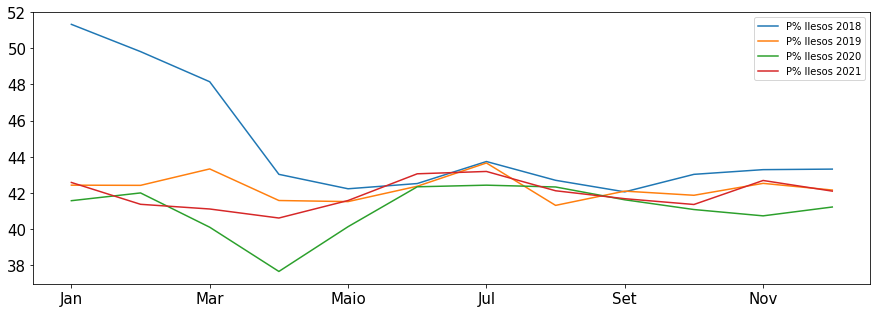

In [20]:
#Primeiro apresentando os dados da estrutura da tabela anterior:
df_prop.plot(y=['P% Ilesos 2018','P% Ilesos 2019','P% Ilesos 2020','P% Ilesos 2021'], figsize=(15,5), fontsize=15)

<p>Antes de mais nada, esse tipo de sobreposição de gráfico é um pouco complicado para análise.</p>
<p style= "text-align:justify;">Se analisado o conjunto de todas as proporções percentuais de ilesos por ano, em uma única reta temporal de janeiro a dezembro, é possível observar historicamente, que houve sempre  uma redução no índice de ilesos entre os meses de março a maio. Desta forma, pode-se dizer que o começo da pandemia da COVID-19 só intensificou esse processo de redução entre os meses de Março a Maio de 2020, mas no ano seguinte o índice retorna aos patamares "normais" e apresentando uma leve diminuição nesse período. </p>

<AxesSubplot:>

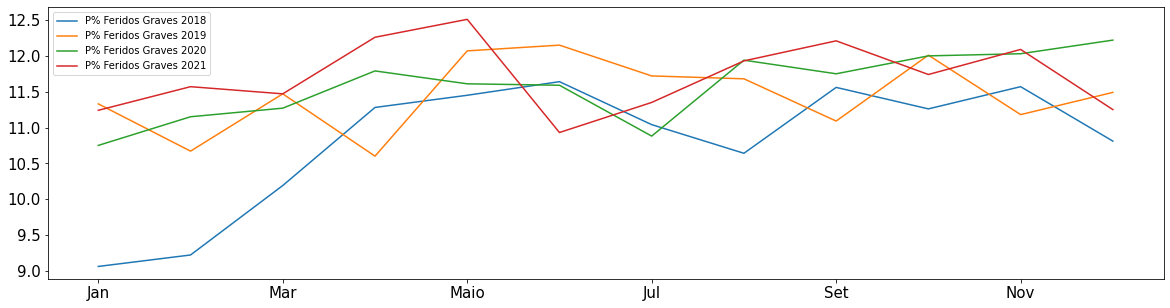

In [21]:
#Apresentando os dados da proporção de feridos da tabela anterior:
df_prop.plot(y=['P% Feridos Graves 2018','P% Feridos Graves 2019','P% Feridos Graves 2020','P% Feridos Graves 2021'], figsize=(20,5), fontsize=15)

<p style= "text-align:justify;">Já no senário da proporção de feridos graves, historicamente falando existe uma tendência natural de crescimento do seu indicador. Se analisado esse indicador em relação ao começo da pandemia da COVID-19, ou seja, entre os meses de março a abril de 2020, pode-se observar que houve um crescimento acinto assítono acima da média em relação aos outros anos nesse mesmo período, em outras palavras, algo não esperado para um começo de pandemia devido ao isolamento social. Além disso, o único momento em 2020 que ocorreu uma redução significativa foi no mês de julho, onde, apresentou a menor proporção histórica entre os anos de 2018 a 2021.</p>
<p style= "text-align:justify;"><strong>**Por fim, pode-se concluir em uma ótica de análise mensal (janeiro a dezembro), que a pandemia não gerou impacto significativo na redução da proporção de feridos graves e ilesos.</strong></p>

<p></p>

<h2>5. Visualização</h2>
<h4>Restruturando o DataFrame de proporções:</h4>

In [22]:
#Aqui estou utilizando a mesma ideia aplicada na construação do DataFrame anterior, apenas mudando seu axis para linhas:
prop_2018 = ano2018.groupby('Ano_Mes')[['ilesos','feridos','feridos_graves','mortos','pessoas']].sum()
prop_2018.reset_index(inplace=True)
prop_2018['P% Ilesos'] = round(((prop_2018['ilesos'] / prop_2018['pessoas'])*100),2)
prop_2018['P% Feridos Graves'] = round(((prop_2018['feridos_graves'] / prop_2018['pessoas'])*100),2)
prop_2018['P% Mortos'] = round(((prop_2018['mortos'] / prop_2018['pessoas'])*100),2)

prop_2019 = ano2019.groupby('Ano_Mes')[['ilesos','feridos','feridos_graves','mortos','pessoas']].sum()
prop_2019['P% Ilesos'] = round(((prop_2019['ilesos'] / prop_2019['pessoas'])*100),2)
prop_2019['P% Feridos Graves'] = round(((prop_2019['feridos_graves'] / prop_2019['pessoas'])*100),2)
prop_2019['P% Mortos'] = round(((prop_2019['mortos'] / prop_2019['pessoas'])*100),2)
prop_2019.reset_index(inplace=True)

prop_2020 = ano2020.groupby('Ano_Mes')[['ilesos','feridos','feridos_graves','mortos','pessoas']].sum()
prop_2020['P% Ilesos'] = round(((prop_2020['ilesos'] / prop_2020['pessoas'])*100),2)
prop_2020['P% Feridos Graves'] = round(((prop_2020['feridos_graves'] / prop_2020['pessoas'])*100),2)
prop_2020['P% Mortos'] = round(((prop_2020['mortos'] / prop_2020['pessoas'])*100),2)
prop_2020.reset_index(inplace=True)

prop_2021 = ano2021.groupby('Ano_Mes')[['ilesos','feridos','feridos_graves','mortos','pessoas']].sum()
prop_2021['P% Ilesos'] = round(((prop_2021['ilesos'] / prop_2021['pessoas'])*100),2)
prop_2021['P% Feridos Graves'] = round(((prop_2021['feridos_graves'] / prop_2021['pessoas'])*100),2)
prop_2021['P% Mortos'] = round(((prop_2021['mortos'] / prop_2021['pessoas'])*100),2)
prop_2021.reset_index(inplace=True)

#concatenando todos os DataFrames de proporções anos em um único DataFrame:
df_analise = pd.concat(objs=[prop_2018,
                             prop_2019,
                             prop_2020,
                             prop_2021], 
                       axis=0, join='inner', ignore_index=True)


<h3>Tabela de Proporções de Ilesos (%) - [2018 a 2021]</h3>

<AxesSubplot:xlabel='Ano_Mes'>

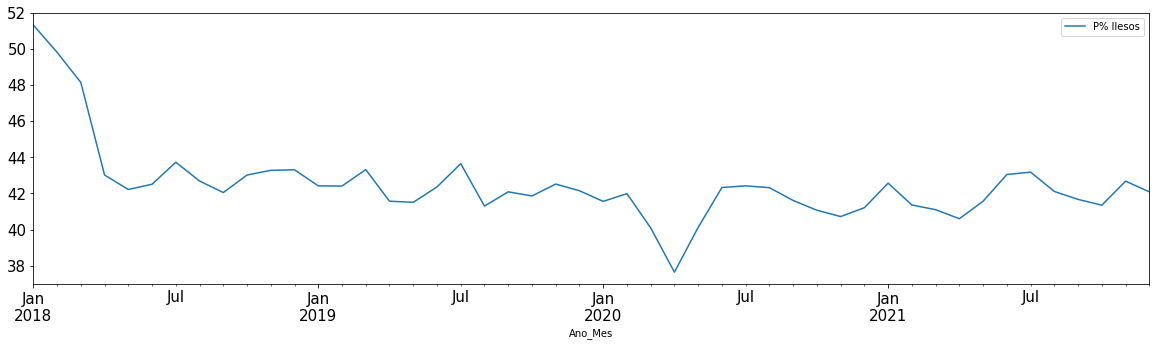

In [23]:
#usando a função plot para imprimir o gráfico:
df_analise.plot(x='Ano_Mes', y=['P% Ilesos'], figsize=(20,5), fontsize=15)

<p style= "text-align:justify;">Conforme o gráfico acima, pode-se observar que a tendência histórica da proporção de ilesos vem diminuindo com o passar dos anos, isso pode ser reflexo de uma postura mais imprudente dos brasileiros com relação ao trânsito nas rodovias. Além disso, é perceptível que o começo da pandemia da COVID-19 (em 2020) só provocou a diminuição da incidência de ilesos entre os meses de fevereiro a abril, retornando o crescimento em maio 2020.</p>

<h3>Tabela de Proporções de Feridos Graves (%) - [2018 a 2021]</h3>

<AxesSubplot:xlabel='Ano_Mes'>

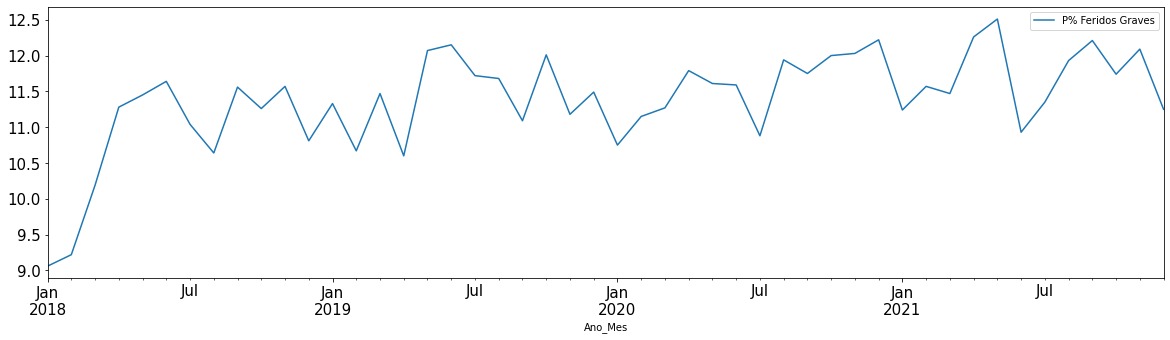

In [24]:
#usando a função plot para imprimir o gráfico:
df_analise.plot(x='Ano_Mes', y=['P% Feridos Graves'], figsize=(20,5), fontsize=15)

<p style= "text-align:justify;">Se analisado o gráfico acima da proporção de feridos graves entre 2018 a 2021, pode-se notar que ocorreu um processo histórico de crescimento nesse indicador. Tal reflexo, pode ser efeito(ou consequência) da imprudência dos brasileiros nas estradas. Outro destaque, que esse gráfico permite analisar, é que a incidência dos acidentes que ocorreram durante o período da pandemia da COVID-19, apresentou uma proporção maior de feridos graves, intensificando assim o processo de crescimento do indicador, em outras palavras, os acidentes que ocorreram nesse período de pandemia foram mais lesivos.</p> 

<h3>Tabela de Proporções de Mortos (%) - [2018 a 2021]</h3>

<AxesSubplot:xlabel='Ano_Mes'>

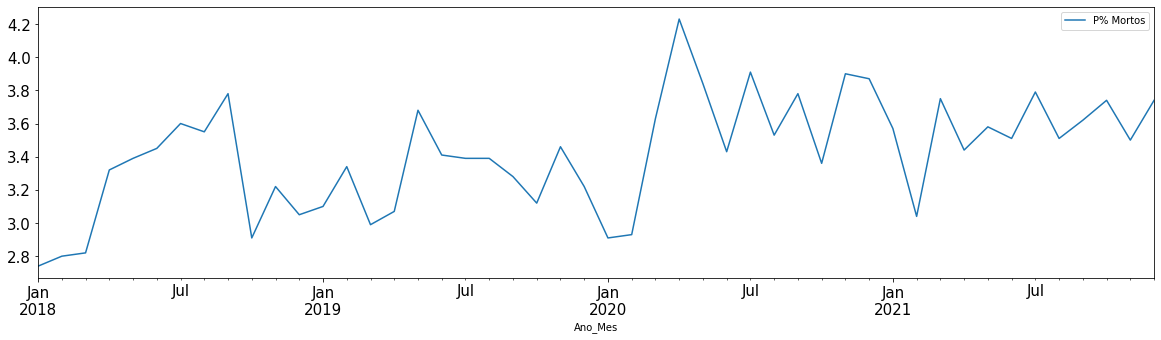

In [25]:
#usando a função plot para imprimir o gráfico:
df_analise.plot(x='Ano_Mes', y=['P% Mortos'], figsize=(20,5), fontsize=15)

<p style= "text-align:justify;">Conforme o gráfico acima da proporção de mortos em relação aos anos, é intensificado ainda mais a conclusão que os registros de acidentes realizados durante o período de pandemia, apresentaram uma incidência maior de desastres lesivos. Se observado os meses de fevereiro a abril de 2020 (período que registra o começo da pandemia da COVID-19 no Brasil), é notório o crescimento da proporção de mortos chegando a ser registrado 4,2% dos casos como mortes.</p>

<h3>Tabela de Registro de Acidentes com número de Ilesos, Feridos Graves e Mortos - [2018-2021]</h3>

<AxesSubplot:xlabel='Ano_Mes'>

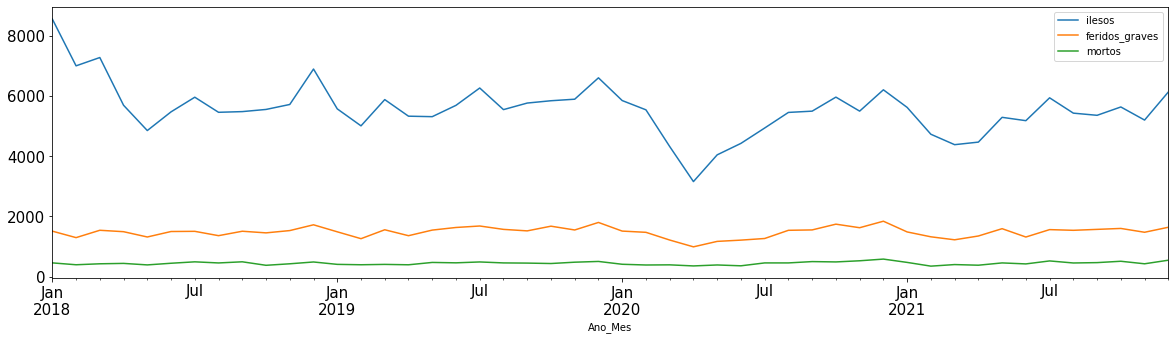

In [26]:
#usando a função plot para imprimir o gráfico:
df_analise.plot(x='Ano_Mes',y=['ilesos','feridos_graves', 'mortos'], figsize=(20,5), fontsize=15)


<p style= "text-align:justify;">Quando comparado a quantidade de registro de ilesos em relação a feridos graves e mortos, percebe-se a diferença notável das proporções quantitativas. Além disso, fica visível na análise cronológica de longo prazo, é a incidência de Feridos Graves e Mortos apresentar uma certa "constância" no número de seus registro perante a quantidade verificada de registro de ilesos, que apresentou uma tendência de decrescimento até o começo de 2020 (inicio da pandemia da COVID-19), e retornando ao seu crescimento após isso.</p>
<p style= "text-align:justify;">Outro destaque que esse gráfico também permite, é fato de que no mês de abril de 2020 apresentou uma redução no registro de ilesos e feridos graves, um reflexo provacado pelo isolamento social aderido por muitas famílias e sugerido pelos governos dos estados do Brasil.</p>

In [27]:
#Pegando uma informação do começo do projeto para gerar a conclusão da análise:
print('Quantidade de acidentes registradas por anos:')
print(f'\t*2018: {cont_acident_2018}')
print(f'\t*2019: {cont_acident_2019}')
print(f'\t*2020: {cont_acident_2020}')
print(f'\t*2021: {cont_acident_2021}')

Quantidade de acidentes registradas por anos:
	*2018: 69332
	*2019: 67556
	*2020: 63576
	*2021: 64539


<h2>Conclusão:</h2>

<p style= "text-align:justify;">Somando as informações apresentadas por todos os gráficos, mais a informação da quantidade de acidentes por ano, é possível concluir que ocorreu de fato uma redução no número de registros de acidentes entre os anos de 2019 a 2021. <br><br>Mas que essa diminuição, não gerou impacto significativo no número de ocorrências de acidentes com fatalidades maiores, apenas diminui o número de registros com gravidades menores, como o caso da proporção de ilesos. <br><br>Além disso, a pandemia da COVID-19 não gerou redução no número de acidentes como seria "pressuposto" pelo fato da existência do isolamento social, que em teoria deveria ter diminuído a incidência de acidentes no total, mas que de fato não ocorreu, e os acidentes registrados nesse período apresentaram grau de fatalidade maior. </p>